In [1]:
# Load packages
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = 'C:/Users/angel/Documents/Economics/Research/Banking Project/data/intermediate/call_reports_SP/'

# Set path to be the directory:
os.chdir(path)

In [ ]:
#df = pd.concat([pd.read_csv(f) for f in os.listdir() if f.endswith('.csv')])
#df = df.iloc[:, 0:270]
#df['Date'] = df['Date'].astype(str)
#df['Month'] = np.where(df['Date'].str.len() == 8, df['Date'].str[0:2], '0'+df['Date'].str[0])
#df['Day'] = df['Date'].str[-6:-4]
#df['Year'] = df['Date'].str[-4:]
#df['Date'] = pd.to_datetime(df['Year'] + '-' + df['Month'] + '-' + df['Day'])
#df.to_csv(path + 'call_reports.csv', index = False)

In [3]:
# Read file that contains only the variables of interest, specify that the column 'Date' is a date:
df = pd.read_csv('call_reports.csv', parse_dates = ['Date'])

C:\Users\angel\AppData\Local\Temp\ipykernel_17104\1849562282.py:2: DtypeWarning: Columns (102,146,187,228) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('call_reports.csv', parse_dates = ['Date'])


### Deposits

In [4]:
# Create a new column that will contain the deposit expenditure it will sum 'RIADA517', 'RIADA518', 'RIAD4508', 'RIAD0093' for
# any date before 2017:
df['Deposit Expenditure'] = np.where(df['Date'] < '2017-01-01', df['RIADA517']+df['RIADA518']+df['RIAD4508']+df['RIAD0093'], 
                                     df['RIADHK03']+df['RIADHK04']+df['RIAD4508']+df['RIAD0093'])

In [5]:
df['Total Deposit'] = np.where(df['Date'] < '2017-01-01', df['RCON3485']+df['RCONB563']+df['RCONA514']+df['RCONA529'], 
                                     df['RCON3485']+df['RCONB563']+df['RCONHK16']+df['RCONHK17'])

In [10]:
df = df[df['Total Deposit']>0]

In [11]:
df['Deposit Rate'] = df['Deposit Expenditure'] / df['Total Deposit']

In [12]:
# Create an extra column in df3 with the avg. deposit rate per Date:
df['Avg. Deposit Rate'] = df.groupby('Date')['Deposit Rate'].transform('mean')
df['Std. Deposit Rate'] = df.groupby('Date')['Deposit Rate'].transform('std')

In [45]:
df['R_hat'] = (df['Deposit Rate'] - df['Avg. Deposit Rate']) / df['Std. Deposit Rate']

In [21]:
# show the series of avg. deposit rate per Date:
df['Avg. Deposit Rate'].unique()

array([0.01197643, 0.00751949, 0.00572269, 0.00421939, 0.0046874 ,
       0.00687179, 0.00896238, 0.00842553, 0.00571378, 0.00394387,
       0.00292577, 0.0022249 , 0.00165468, 0.00261651, 0.00127871,
       0.00127655, 0.00132213, 0.0016039 , 0.0024779 , 0.00252714,
       0.00127683, 0.00086369, 0.00316986, 0.00611509, 0.02946373,
       0.01433176, 0.01316302, 0.00825565, 0.0097802 , 0.01416702,
       0.0178944 , 0.01554661, 0.01082385, 0.00759205, 0.00579778,
       0.00428483, 0.00324111, 0.00286243, 0.00256845, 0.00254566,
       0.00268781, 0.00337049, 0.00511911, 0.00445408, 0.00236499,
       0.0017587 , 0.00734106, 0.03263717, 0.02068289, 0.01637166,
       0.01233161, 0.01531858, 0.02216342, 0.02680652, 0.02236101,
       0.01550998, 0.01106744, 0.00828338, 0.00687128, 0.00478019,
       0.00407822, 0.00382999, 0.00384064, 0.0041408 , 0.00536577,
       0.00782472, 0.00611491, 0.00337538, 0.0031838 , 0.01225739,
       0.04081068, 0.026263  , 0.02062847, 0.01643156, 0.02114

In [23]:
df['Std. Deposit Rate'].unique()

array([1.88365726e-03, 1.77723371e-03, 1.76400363e-02, 1.30351770e-03,
       1.27515004e-03, 1.80084615e-03, 1.94831927e-03, 1.81300928e-03,
       1.69121852e-03, 1.29635466e-03, 1.10439483e-03, 9.29138600e-04,
       7.70410719e-04, 1.01509907e-01, 6.69805276e-04, 6.77730390e-04,
       8.05928132e-04, 8.40077660e-04, 1.21234795e-03, 1.16006660e-03,
       7.63460380e-04, 5.62952651e-04, 1.88081730e-03, 2.38068751e-03,
       6.10603948e-01, 3.48809806e-03, 2.27043746e-01, 2.88853630e-03,
       2.96957190e-03, 3.44919745e-03, 5.47522827e-03, 3.76770539e-03,
       3.67812618e-03, 2.51304484e-03, 1.00711813e-02, 1.82527505e-03,
       1.53570308e-03, 1.05940845e-02, 2.17841289e-03, 1.34787142e-03,
       1.50545246e-03, 1.74621902e-03, 2.42571309e-03, 2.22352278e-03,
       1.46103649e-03, 1.11445243e-03, 3.93154470e-03, 6.29454448e-03,
       5.31894654e-03, 9.93507846e-02, 4.41520434e-03, 4.06247277e-03,
       1.43301721e-02, 7.76554902e-03, 1.79292090e-02, 7.12005932e-03,
      

### Deposits

In [ ]:
# Until here, dataset matches with Lucas.
#df2[(df2['Date']>'2023-01-01') & (df2['Date']<'2024-01-01')]['Deposit Rate'].describe()

In [24]:
# Trim the 'Deposit Rate' from df2 on the 1st and 99th percentiles, per year:
df2 = df.groupby('Date').apply(lambda x: x[(x['Deposit Rate'] >= x['Deposit Rate'].quantile(0.01, interpolation='midpoint')) & 
                                            (x['Deposit Rate'] <= x['Deposit Rate'].quantile(0.99, interpolation='midpoint'))]).reset_index(drop=True)

# We may not want to trim since we don't want BofA to be dropped out.

C:\Users\angel\AppData\Local\Temp\ipykernel_17104\1061853393.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df2 = df.groupby('Date').apply(lambda x: x[(x['Deposit Rate'] >= x['Deposit Rate'].quantile(0.01, interpolation='midpoint')) &


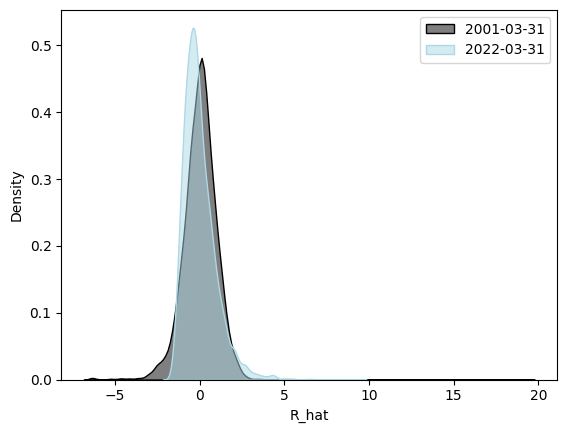

In [46]:
# plot the kernel distribution of the deposit rates for the above dates:
sns.kdeplot(df[df['Date']=='2001-03-31']['R_hat'], label='2001-03-31', color='black', fill=True, alpha=0.5)
sns.kdeplot(df[df['Date']=='2022-03-31']['R_hat'], label='2022-03-31', color='lightblue', fill=True, alpha=0.5)
plt.legend()
plt.show()

C:\Users\angel\AppData\Local\Temp\ipykernel_17104\904662299.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_bottom = df.groupby('Date').apply(lambda x: x[x['Total Deposit'] <= x['Total Deposit'].quantile(0.1)]).reset_index(drop=True)


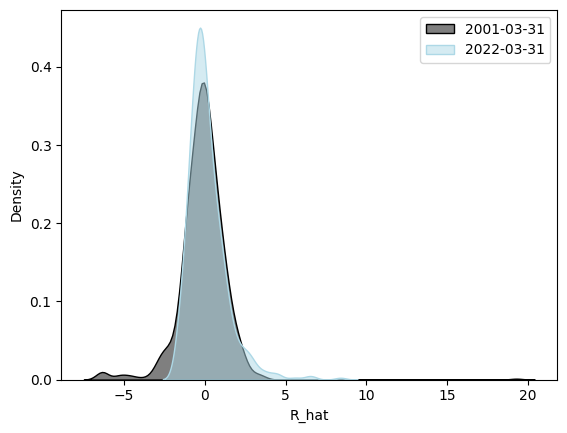

In [48]:
df_bottom = df.groupby('Date').apply(lambda x: x[x['Total Deposit'] <= x['Total Deposit'].quantile(0.1)]).reset_index(drop=True)

# plot the kernel distribution of the deposit rates for the above dates:
sns.kdeplot(df_bottom[df_bottom['Date']=='2001-03-31']['R_hat'], label='2001-03-31', color='black', fill=True, alpha=0.5)
sns.kdeplot(df_bottom[df_bottom['Date']=='2022-03-31']['R_hat'], label='2022-03-31', color='lightblue', fill=True, alpha=0.5)
plt.legend()
plt.show()

C:\Users\angel\AppData\Local\Temp\ipykernel_17104\3264208960.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top = df.groupby('Date').apply(lambda x: x[x['Total Deposit'] >= x['Total Deposit'].quantile(0.9)]).reset_index(drop=True)


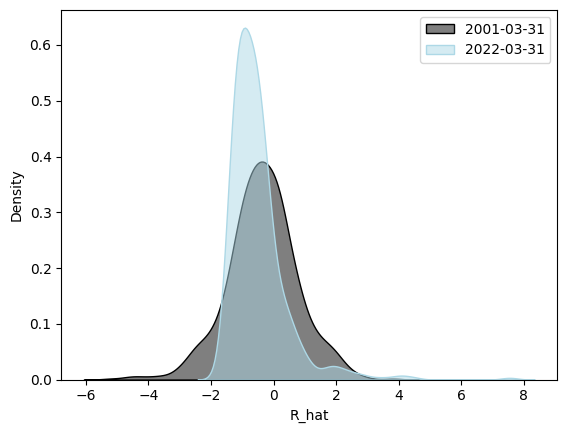

In [49]:
df_top = df.groupby('Date').apply(lambda x: x[x['Total Deposit'] >= x['Total Deposit'].quantile(0.9)]).reset_index(drop=True)

# plot the kernel distribution of the deposit rates for the above dates:
sns.kdeplot(df_top[df_top['Date']=='2001-03-31']['R_hat'], label='2001-03-31', color='black', fill=True, alpha=0.5)
sns.kdeplot(df_top[df_top['Date']=='2022-03-31']['R_hat'], label='2022-03-31', color='lightblue', fill=True, alpha=0.5)
plt.legend()
plt.show()

### Loans and Assets

In [50]:
# Check total Interest Income:
df['Interest Income'] = df['RIAD4107']
# Check Total Assets:
df['Total Assets'] = df['RCFD2170']
df['ROA'] = df['Interest Income'] / df['Total Assets']

In [51]:
df = df[df['Total Assets']>0]

In [52]:
# Create an extra column in df3 with the avg. deposit rate per Date:
df['Avg. ROA'] = df.groupby('Date')['ROA'].transform('mean')
df['Std. ROA'] = df.groupby('Date')['ROA'].transform('std')

In [53]:
df['ROA_hat'] = (df['ROA'] - df['Avg. ROA']) / df['Std. ROA']

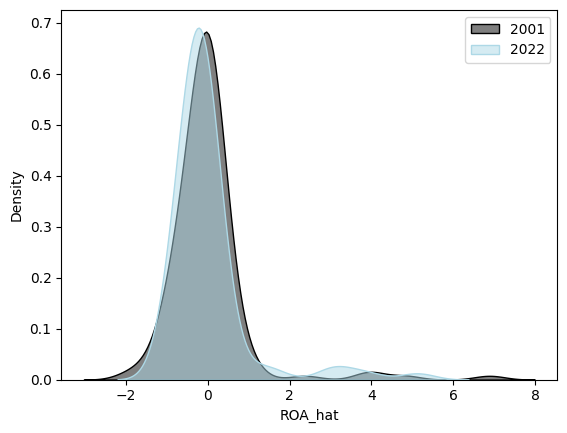

In [54]:
# plot the kernel distribution of the ROA for the above dates:
sns.kdeplot(df[df['Date']=='2001-03-31']['ROA_hat'], label='2001', color='black', fill=True, alpha=0.5)
sns.kdeplot(df[df['Date']=='2022-03-31']['ROA_hat'], label='2022', color='lightblue', fill=True, alpha=0.5)
plt.legend()
plt.show()